# KNN from scratch

Proximity is measured using Euclidean distance.

In [1]:
import numpy as np
import math
from collections import Counter
import warnings
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt 
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
dataset = {'k' : [[1,2], [2,3], [3,1]],
            'r' : [[6,5], [7,7], [8,6]]}
new_features = [5,7]

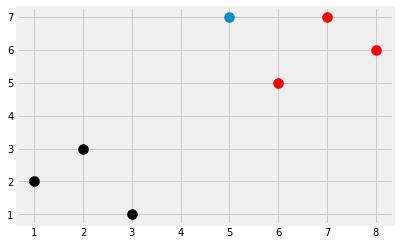

In [3]:
# Plotting
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0], j[1], s=100, color=i)

plt.scatter(new_features[0], new_features[1], s = 100)
plt.show()

In [4]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups.')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result
        

In [5]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

r


## Comparing with sklearn's KNN library method

In [6]:
df = pd.read_csv('./data/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop('id', axis=1, inplace=True)

X = np.array(df.drop(['class'], axis=1), dtype=np.float64)
y = np.array(df['class'], dtype=np.float64)

In [7]:
def format_dataset(features_data, labels_data):
    result = {}
    for i in range(len(features_data)):
        if not (labels_data[i] in result.keys()):
            result[labels_data[i]] = []
        result[labels_data[i]].append(features_data[i])
        
    return result

def make_predictions(data, predict, k=3):
    predictions = []
    for row in predict:
        predictions.append(k_nearest_neighbors(data_as_dict, row))
    return np.array(predictions, dtype=np.float64)

def compute_accuracy(predictions, actual):
    return sum(predictions == actual) / len(predictions)

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

data_as_dict = format_dataset(X_train, y_train)
predictions = make_predictions(data_as_dict, X_test, k=25)
accuracy = compute_accuracy(predictions, y_test)
print(accuracy)

0.9785714285714285


**Note:** KNN scales well upto moderate data sizes, but is not suitable for data in the order of terabytes.